In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
with open (r"C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\9. Association Rules\groceries.csv")\
as f: groceries = f.read()
    
groceries = groceries.split("\n")
groceries

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [3]:
groceries_list = []

for i in groceries:
    groceries_list.append(i.split(","))

In [4]:
groceries_df = pd.DataFrame(groceries_list)
groceries_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
names=[]
for i in range(0,32):
    names.append('item'+str(i))

In [6]:
groceries_df.columns = names
groceries_df

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,item22,item23,item24,item25,item26,item27,item28,item29,item30,item31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
dataset = groceries_df
dataset = dataset.replace(np.nan, '')
dataset

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,item22,item23,item24,item25,item26,item27,item28,item29,item30,item31
0,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,...,,,,,,,,,,
1,tropical fruit,yogurt,coffee,,,,,,,,...,,,,,,,,,,
2,whole milk,,,,,,,,,,...,,,,,,,,,,
3,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,...,,,,,,,,,,
4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,cooking chocolate,,,,,,,,,,...,,,,,,,,,,
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,,,,,,,,,,
9833,semi-finished bread,bottled water,soda,bottled beer,,,,,,,...,,,,,,,,,,
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,,,,,,...,,,,,,,,,,


In [8]:
dataset
transactions = []
for i in range(0, 9835):
    transactions.append([str(dataset.values[i,u]) for u in range(1, 31)])

In [9]:
groceries_series  = pd.DataFrame(pd.Series(transactions),columns=['item_list'])
groceries_series

,item_list
0,"[semi-finished bread, margarine, ready soups, ..."
1,"[yogurt, coffee, , , , , , , , , , , , , , , ,..."
2,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
3,"[yogurt, cream cheese , meat spreads, , , , , ..."
4,"[whole milk, condensed milk, long life bakery ..."
...,...
9830,"[chicken, beef, hamburger meat, citrus fruit, ..."
9831,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
9832,"[citrus fruit, other vegetables, butter, yogur..."
9833,"[bottled water, soda, bottled beer, , , , , , ..."


In [10]:
final_df = groceries_series['item_list'].str.join(',')
final_df

0       semi-finished bread,margarine,ready soups,,,,,...
1               yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2                           ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3       yogurt,cream cheese ,meat spreads,,,,,,,,,,,,,...
4       whole milk,condensed milk,long life bakery pro...
                              ...                        
9830    chicken,beef,hamburger meat,citrus fruit,grape...
9831                        ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9832    citrus fruit,other vegetables,butter,yogurt,fr...
9833    bottled water,soda,bottled beer,,,,,,,,,,,,,,,...
9834    tropical fruit,other vegetables,vinegar,shoppi...
Name: item_list, Length: 9835, dtype: object

In [11]:
df = final_df.str.get_dummies(sep=',')
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### At 1% Support

In [14]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.026335,(UHT-milk)
1,0.016675,(baking powder)
2,0.021556,(beef)
3,0.020946,(berries)
4,0.017895,(beverages)
...,...,...
212,0.013320,"(whole milk, whipped/sour cream, other vegetab..."
213,0.019014,"(whole milk, yogurt, other vegetables)"
214,0.013726,"(whole milk, yogurt, rolls/buns)"
215,0.012303,"(root vegetables, whole milk, yogurt)"


In [15]:
rule = association_rules(frequent_itemsets, metric='lift', min_threshold = 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.021556,0.146721,0.010066,0.466981,3.182785,0.006903,1.600842
1,(other vegetables),(beef),0.146721,0.021556,0.010066,0.068607,3.182785,0.006903,1.050517
2,(beef),(whole milk),0.021556,0.182613,0.010880,0.504717,2.763859,0.006943,1.650343
3,(whole milk),(beef),0.182613,0.021556,0.010880,0.059577,2.763859,0.006943,1.040430
4,(bottled beer),(bottled water),0.062430,0.093238,0.013726,0.219870,2.358145,0.007906,1.162321
...,...,...,...,...,...,...,...,...,...
333,"(whole milk, tropical fruit)",(yogurt),0.025013,0.116624,0.010473,0.418699,3.590154,0.007556,1.519653
334,"(yogurt, tropical fruit)",(whole milk),0.017590,0.182613,0.010473,0.595376,3.260312,0.007261,2.020113
335,(whole milk),"(yogurt, tropical fruit)",0.182613,0.017590,0.010473,0.057350,3.260312,0.007261,1.042178
336,(yogurt),"(whole milk, tropical fruit)",0.116624,0.025013,0.010473,0.089799,3.590154,0.007556,1.071179


#### At 2% Support

In [16]:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.026335,(UHT-milk)
1,0.021556,(beef)
2,0.020946,(berries)
3,0.062430,(bottled beer)
4,0.093238,(bottled water)
...,...,...
76,0.024098,"(yogurt, soda)"
77,0.025013,"(whole milk, tropical fruit)"
78,0.027961,"(whole milk, whipped/sour cream)"
79,0.020132,"(whipped/sour cream, yogurt)"


In [17]:
rule = association_rules(frequent_itemsets, metric='lift', min_threshold = 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(other vegetables),0.093238,0.146721,0.020031,0.214831,1.464215,0.006350,1.086746
1,(other vegetables),(bottled water),0.146721,0.093238,0.020031,0.136521,1.464215,0.006350,1.050126
2,(bottled water),(rolls/buns),0.093238,0.149771,0.021861,0.234460,1.565456,0.007896,1.110626
3,(rolls/buns),(bottled water),0.149771,0.093238,0.021861,0.145961,1.565456,0.007896,1.061733
4,(bottled water),(soda),0.093238,0.144484,0.024911,0.267176,1.849171,0.011440,1.167423
...,...,...,...,...,...,...,...,...,...
61,(whipped/sour cream),(whole milk),0.063854,0.182613,0.027961,0.437898,2.397955,0.016301,1.454161
62,(whipped/sour cream),(yogurt),0.063854,0.116624,0.020132,0.315287,2.703438,0.012685,1.290139
63,(yogurt),(whipped/sour cream),0.116624,0.063854,0.020132,0.172624,2.703438,0.012685,1.131465
64,(whole milk),(yogurt),0.182613,0.116624,0.047077,0.257795,2.210475,0.025780,1.190205


#### At 3% Support

In [18]:
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.062430,(bottled beer)
1,0.093238,(bottled water)
2,0.059075,(brown bread)
3,0.047687,(butter)
4,0.046162,(canned beer)
5,0.044942,(chocolate)
6,0.036706,(citrus fruit)
7,0.049924,(coffee)
8,0.036096,(cream cheese )
9,0.044026,(curd)


In [19]:
rule = association_rules(frequent_itemsets, metric='lift', min_threshold = 0.7)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.146721,0.149771,0.035282,0.240471,1.605590,0.013308,1.119416
1,(rolls/buns),(other vegetables),0.149771,0.146721,0.035282,0.235574,1.605590,0.013308,1.116235
2,(root vegetables),(other vegetables),0.079715,0.146721,0.037011,0.464286,3.164414,0.025315,1.592788
3,(other vegetables),(root vegetables),0.146721,0.079715,0.037011,0.252252,3.164414,0.025315,1.230742
4,(whole milk),(other vegetables),0.182613,0.146721,0.060702,0.332405,2.265562,0.033908,1.278140
5,(other vegetables),(whole milk),0.146721,0.182613,0.060702,0.413721,2.265562,0.033908,1.394195
6,(yogurt),(other vegetables),0.116624,0.146721,0.036706,0.314734,2.145121,0.019594,1.245180
7,(other vegetables),(yogurt),0.146721,0.116624,0.036706,0.250173,2.145121,0.019594,1.178106
8,(soda),(rolls/buns),0.144484,0.149771,0.032537,0.225194,1.503583,0.010897,1.097343
9,(rolls/buns),(soda),0.149771,0.144484,0.032537,0.217244,1.503583,0.010897,1.092953


In [20]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

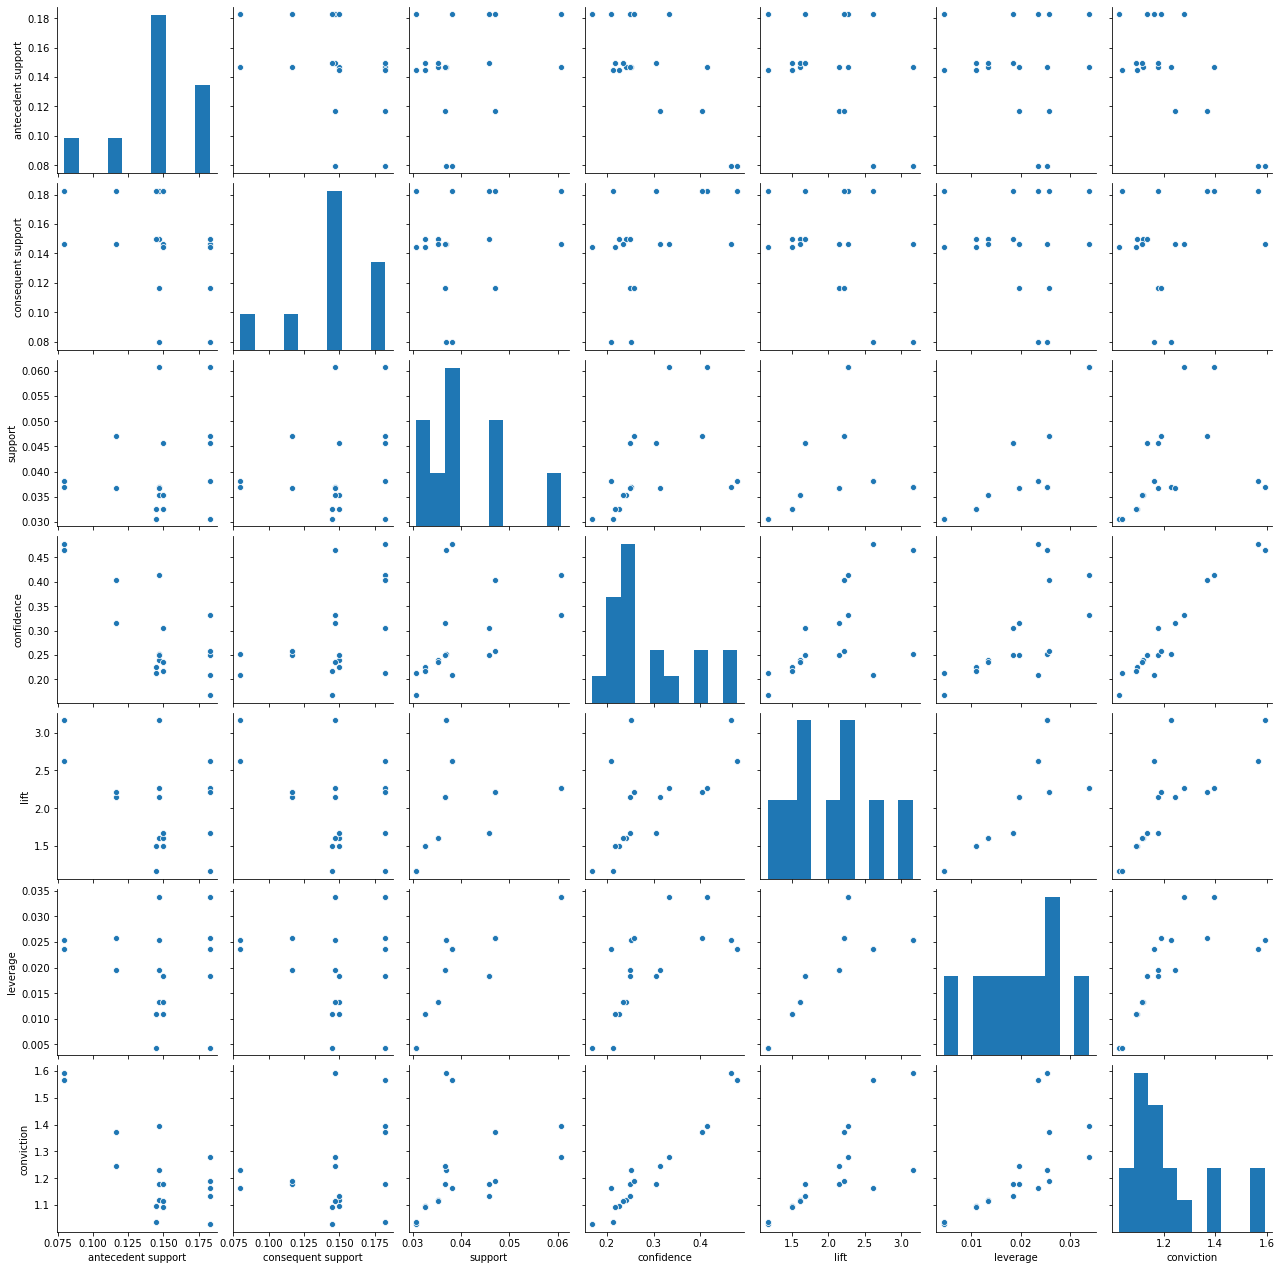

In [29]:
sns.pairplot(rule)
plt.show()